###Import

In [1]:
!pip install plotly
!pip install openpyxl
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 36.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 28.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 49.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 44.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 37.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 42.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 46.6 MB/s eta 0:00:0000:0100:01


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.dates as mdates

pd.set_option('display.max_columns', None)

###Load Curtailments and Production

In [3]:
# Using the 'Curtailments' sheet to load curtailment data
curtailment_data_2020 = pd.read_excel("data/raw/productionandcurtailmentsdata_2020.xlsx", sheet_name="Curtailments")
# Converting all column names to lowercase for consistency and easier referencing
curtailment_data_2020.columns = [feature.lower() for feature in curtailment_data_2020.columns]

# Using the 'Production' sheet to load production data
production_data_2020 = pd.read_excel("data/raw/productionandcurtailmentsdata_2020.xlsx", sheet_name="Production")
# Converting all column names to lowercase for consistency and easier referencing
production_data_2020.columns = [feature.lower() for feature in production_data_2020.columns]

In [4]:
#2021
curtailment_data_2021 = pd.read_excel("data/raw/productionandcurtailmentsdata_2021.xlsx",sheet_name="Curtailments")
curtailment_data_2021.columns = [feature.lower() for feature in curtailment_data_2021.columns]


production_data_2021 = pd.read_excel("data/raw/productionandcurtailmentsdata_2021.xlsx",sheet_name="Production")
production_data_2021.columns = [feature.lower() for feature in production_data_2021.columns]

#2022
curtailment_data_2022 = pd.read_excel("data/raw/productionandcurtailmentsdata_2022.xlsx",sheet_name="Curtailments")
curtailment_data_2022.columns = [feature.lower() for feature in curtailment_data_2022.columns]

production_data_2022 = pd.read_excel("data/raw/productionandcurtailmentsdata_2022.xlsx",sheet_name="Production")
production_data_2022.columns = [feature.lower() for feature in production_data_2022.columns]

#2023
curtailment_data_2023 = pd.read_excel("data/raw/productionandcurtailmentsdata_2023.xlsx",sheet_name="Curtailments")
curtailment_data_2023.columns = [feature.lower() for feature in curtailment_data_2023.columns]

production_data_2023 = pd.read_excel("data/raw/productionandcurtailmentsdata_2023.xlsx",sheet_name="Production")
production_data_2023.columns = [feature.lower() for feature in production_data_2023.columns]

#2024
curtailment_data_2024 = pd.read_excel("data/raw/production-and-curtailments-data-2024.xlsx",sheet_name="Curtailments")
curtailment_data_2024.columns = [feature.lower() for feature in curtailment_data_2024.columns]

production_data_2024 = pd.read_excel("data/raw/production-and-curtailments-data-2024.xlsx",sheet_name="Production")
production_data_2024.columns = [feature.lower() for feature in production_data_2024.columns]

#2025
curtailment_data_2025 = pd.read_excel("data/raw/production-and-curtailments-data-2025.xlsx",sheet_name="Curtailments")
curtailment_data_2025.columns = [feature.lower() for feature in curtailment_data_2025.columns]

production_data_2025 = pd.read_excel("data/raw/production-and-curtailments-data-2025.xlsx",sheet_name="Production")
production_data_2025.columns = [feature.lower() for feature in production_data_2025.columns]

###Load California Weather Data

In [5]:
# Load the weather data

# The file contains hourly data for California

weather_data = pd.read_csv("data/raw/California hourly data 2020-01-01 to 2025-01-31.csv")


###Printing data set

In [6]:
production_data_2025.tail()

,date,hour,interval,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports)
8923,2025-01-31 23:35:00,24,8,23574.427396,0.0,2221.710549,21352.716847,3537.813551,2267.691338,1559.802370,8501.533333,15072.913151,7707.605892,-0.019089
8924,2025-01-31 23:40:00,24,9,23622.768047,0.0,2215.542322,21407.225724,3532.562867,2267.342004,1613.154860,8595.640000,15027.132396,7614.072665,-0.004349
8925,2025-01-31 23:45:00,24,10,23521.024297,0.0,2216.633929,21304.390368,3534.338863,2267.808665,1587.348139,8652.866667,14868.145026,7478.649359,0.012604
8926,2025-01-31 23:50:00,24,11,23524.268906,0.0,2228.079253,21296.189653,3544.425815,2267.421335,1570.208172,8688.906667,14835.398268,7453.342946,-0.036029
8927,2025-01-31 23:55:00,24,12,23421.934609,0.0,2284.143670,21137.790939,3601.043065,2267.690329,1637.415669,8369.720000,15052.231003,7546.081939,-0.016393


In [7]:
curtailment_data_2020.head()

,date,hour,interval,wind curtailment,solar curtailment
0,2020-01-01,9,5,NaN,1.960000
1,2020-01-01,9,6,NaN,10.430918
2,2020-01-01,9,10,NaN,1.295686
3,2020-01-01,9,11,40.030000,153.010799
4,2020-01-01,9,12,26.946634,161.819285


In [8]:
# Display the 'weather_data' DataFrame
weather_data.tail()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
44587,califorina,2025-01-31 19:00:00,49.9,48.5,30.1,46.34,0.0,0,NaN,0.0,0.0,12.3,4.3,297.0,1022.3,23.3,21.3,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"SE377,72381023114,74917100479,KTSP,K9L2,723171..."
44588,califorina,2025-01-31 20:00:00,47.5,45.9,30.2,50.81,0.0,0,NaN,0.0,0.0,13.6,4.2,285.0,1022.4,89.6,21.3,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"SE377,72381023114,74917100479,KTSP,K9L2,723171..."
44589,califorina,2025-01-31 21:00:00,48.5,46.4,25.9,41.13,0.0,0,NaN,0.0,0.0,14.5,5.0,313.0,1022.4,43.1,21.3,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"SE377,72381023114,74917100479,KTSP,K9L2,723171..."
44590,califorina,2025-01-31 22:00:00,44.2,44.2,29.2,55.24,0.0,0,NaN,0.0,0.0,15.2,1.9,300.0,1022.9,31.8,21.3,0.0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"SE377,72381023114,74917100479,KTSP,K9L2,723171..."
44591,califorina,2025-01-31 23:00:00,43.0,43.0,27.5,54.02,0.0,0,NaN,0.0,0.0,13.4,2.2,297.0,1022.6,12.9,9.9,0.0,0.0,0,NaN,Clear,clear-night,"SE377,72381023114,74917100479,KTSP,K9L2,723171..."


###EDA On Production Data

In [9]:
production_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105408 entries, 0 to 105407
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            105408 non-null  datetime64[ns]
 1   hour                            105408 non-null  int64         
 2   interval                        105408 non-null  int64         
 3   load                            105408 non-null  float64       
 4   solar                           105408 non-null  float64       
 5   wind                            105408 non-null  float64       
 6   net load                        105408 non-null  float64       
 7   renewables                      105408 non-null  float64       
 8   nuclear                         105408 non-null  float64       
 9   large hydro                     105408 non-null  float64       
 10  imports                         105407 non-null  float64

In [10]:
print(curtailment_data_2021.info(),"\n")
print(curtailment_data_2022.info(),"\n")

print("\nCurtailment data for 2020 and 2021 are not having reason columns where as 2022, 2023, 2024 and 2025 are having reason columns\n")

#Drop Reason columns for 2022,2023 and 2025
curtailment_data_2022 = curtailment_data_2022.drop(columns=['reason'])
curtailment_data_2023 = curtailment_data_2023.drop(columns=['reason'])
curtailment_data_2024 = curtailment_data_2024.drop(columns=['reason'])
curtailment_data_2025 = curtailment_data_2025.drop(columns=['reason'])
print(curtailment_data_2022.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43518 entries, 0 to 43517
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               43518 non-null  datetime64[ns]
 1   hour               43518 non-null  int64         
 2   interval           43518 non-null  int64         
 3   wind curtailment   14498 non-null  float64       
 4   solar curtailment  41221 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.7 MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52757 entries, 0 to 52756
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               52757 non-null  datetime64[ns]
 1   hour               52757 non-null  int64         
 2   interval           52757 non-null  int64         
 3   wind curtailment   22363 non-null  float64 

In [11]:
print("Shape of Production Data 2020",production_data_2020.shape)
print("Shape of Production Data 2021",production_data_2021.shape)
print("Shape of Production Data 2022",production_data_2022.shape)
print("Shape of Production Data 2023",production_data_2023.shape)
print("Shape of Production Data 2024",production_data_2024.shape)
print("Shape of Production Data 2025",production_data_2025.shape)
print("\n Since 2020 and 2024 are leap year there are more records")


Shape of Production Data 2020 (105408, 14)
Shape of Production Data 2021 (105120, 14)
Shape of Production Data 2022 (105120, 14)
Shape of Production Data 2023 (105120, 14)
Shape of Production Data 2024 (105408, 14)
Shape of Production Data 2025 (8928, 14)

 Since 2020 and 2024 are leap year there are more records


In [12]:
# Find the null values in production_data_2020
production_data_2020.isnull().sum()

date                              0
hour                              0
interval                          0
load                              0
solar                             0
wind                              0
net load                          0
renewables                        0
nuclear                           0
large hydro                       0
imports                           1
generation                        0
thermal                           0
load less (generation+imports)    1
dtype: int64

In [13]:
# Calculate the average of 'imports'
average_imports = production_data_2020['imports'].mean()

# Calculate the average of 'load less (generation+imports)'
average_load_less = production_data_2020['load less (generation+imports)'].mean()


In [14]:
print(average_imports,average_load_less)

6417.211838229799 -0.07463717050919713


In [15]:
# Fill the missing value in 'imports'
production_data_2020['imports'] = production_data_2020['imports'].fillna(average_imports)

# Fill the missing value in 'load less (generation+imports)'
production_data_2020['load less (generation+imports)'] = production_data_2020['load less (generation+imports)'].fillna(average_load_less)

In [16]:
# Find the null values in production_data_2020
production_data_2020.isnull().sum()

date                              0
hour                              0
interval                          0
load                              0
solar                             0
wind                              0
net load                          0
renewables                        0
nuclear                           0
large hydro                       0
imports                           0
generation                        0
thermal                           0
load less (generation+imports)    0
dtype: int64

### Merge the Production datasets

In [17]:
# Concatenate the DataFrames
all_production_data = pd.concat([production_data_2020, production_data_2021, production_data_2022, production_data_2023, production_data_2024,production_data_2025], ignore_index=True)

# Display the merged DataFrame
all_production_data.tail()

,date,hour,interval,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports)
535099,2025-01-31 23:35:00,24,8,23574.427396,0.0,2221.710549,21352.716847,3537.813551,2267.691338,1559.802370,8501.533333,15072.913151,7707.605892,-0.019089
535100,2025-01-31 23:40:00,24,9,23622.768047,0.0,2215.542322,21407.225724,3532.562867,2267.342004,1613.154860,8595.640000,15027.132396,7614.072665,-0.004349
535101,2025-01-31 23:45:00,24,10,23521.024297,0.0,2216.633929,21304.390368,3534.338863,2267.808665,1587.348139,8652.866667,14868.145026,7478.649359,0.012604
535102,2025-01-31 23:50:00,24,11,23524.268906,0.0,2228.079253,21296.189653,3544.425815,2267.421335,1570.208172,8688.906667,14835.398268,7453.342946,-0.036029
535103,2025-01-31 23:55:00,24,12,23421.934609,0.0,2284.143670,21137.790939,3601.043065,2267.690329,1637.415669,8369.720000,15052.231003,7546.081939,-0.016393


In [18]:
print("Shape of Production Data",all_production_data.shape)

Shape of Production Data (535104, 14)


### Sampling Data

In [19]:
# Convert the 'date' column to datetime objects if it's not already
all_production_data['date'] = pd.to_datetime(all_production_data['date'])

# Set 'date' as the index
all_production_data = all_production_data.set_index('date')

# Resample to hourly intervals and sum the values
all_production_data_hourly = all_production_data.resample('H').sum()

# Reset the index to have 'date' as a column again
all_production_data_hourly = all_production_data_hourly.reset_index()

# Display the resampled DataFrame
all_production_data_hourly.head()

/tmp/ipykernel_6666/3288546921.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  all_production_data_hourly = all_production_data.resample('H').sum()


,date,hour,interval,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports)
0,2020-01-01 00:00:00,12,78,261642.173073,0.0,3406.967436,258235.205637,20091.520292,27279.731877,15895.241613,99143.546667,162410.879518,99144.385736,87.746888
1,2020-01-01 01:00:00,24,78,252464.832604,0.0,5967.002946,246497.829658,22649.576156,27273.699994,14712.373468,91953.413333,160451.063841,95815.414224,60.355430
2,2020-01-01 02:00:00,36,78,245416.002344,0.0,6199.244249,239216.758095,22898.479955,27280.022811,14073.236606,93985.426667,151384.511224,87132.771853,46.064453
3,2020-01-01 03:00:00,48,78,241363.031667,0.0,5080.579630,236282.452037,21691.987069,27280.588677,14248.185413,94369.893333,146970.820052,83750.058893,22.318281
4,2020-01-01 04:00:00,60,78,239642.357318,0.0,9443.764928,230198.592389,26065.495828,27262.534627,15167.772388,93689.306667,145981.897747,77486.094904,-28.847096


In [20]:
# Drop the 'hour' and 'interval' columns
all_production_data_hourly = all_production_data_hourly.drop(columns=['hour', 'interval'])

# Display the resampled DataFrame
all_production_data_hourly.head()

,date,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports)
0,2020-01-01 00:00:00,261642.173073,0.0,3406.967436,258235.205637,20091.520292,27279.731877,15895.241613,99143.546667,162410.879518,99144.385736,87.746888
1,2020-01-01 01:00:00,252464.832604,0.0,5967.002946,246497.829658,22649.576156,27273.699994,14712.373468,91953.413333,160451.063841,95815.414224,60.355430
2,2020-01-01 02:00:00,245416.002344,0.0,6199.244249,239216.758095,22898.479955,27280.022811,14073.236606,93985.426667,151384.511224,87132.771853,46.064453
3,2020-01-01 03:00:00,241363.031667,0.0,5080.579630,236282.452037,21691.987069,27280.588677,14248.185413,94369.893333,146970.820052,83750.058893,22.318281
4,2020-01-01 04:00:00,239642.357318,0.0,9443.764928,230198.592389,26065.495828,27262.534627,15167.772388,93689.306667,145981.897747,77486.094904,-28.847096


In [21]:
print("Shape of Production Data",all_production_data_hourly.shape)

Shape of Production Data (44592, 12)


In [22]:
# Find the null values in production_data_2021
all_production_data_hourly.isnull().sum()

date                              0
load                              0
solar                             0
wind                              0
net load                          0
renewables                        0
nuclear                           0
large hydro                       0
imports                           0
generation                        0
thermal                           0
load less (generation+imports)    0
dtype: int64

In [23]:
all_production_data_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44592 entries, 0 to 44591
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            44592 non-null  datetime64[ns]
 1   load                            44592 non-null  float64       
 2   solar                           44592 non-null  float64       
 3   wind                            44592 non-null  float64       
 4   net load                        44592 non-null  float64       
 5   renewables                      44592 non-null  float64       
 6   nuclear                         44592 non-null  float64       
 7   large hydro                     44592 non-null  float64       
 8   imports                         44592 non-null  float64       
 9   generation                      44592 non-null  float64       
 10  thermal                         44592 non-null  float64       
 11  lo

### Weather Data EDA

In [24]:
# Select the desired columns and assign to a  DataFrame
# weather_data = weather_data[['datetime', 'temp', 'dew', 'humidity', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy','uvindex']]

weather_data = weather_data[['datetime',	'temp',	'dew',	'humidity',	'precip',	'snowdepth',	'windgust',	'windspeed',	'winddir',	'sealevelpressure',	'cloudcover',	'visibility',	'solarradiation',	'solarenergy',	'uvindex']]

# Convert the 'datetime' column to datetime objects
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])

# Set 'datetime' as the index
# weather_data = weather_data.set_index('datetime')

# Rename the 'datetime' column in weather_data to 'date'
weather_data = weather_data.rename(columns={'datetime': 'date'})

# Display the new DataFrame
weather_data.tail()

,date,temp,dew,humidity,precip,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
44587,2025-01-31 19:00:00,49.9,30.1,46.34,0.0,0.0,12.3,4.3,297.0,1022.3,23.3,21.3,0.0,0.0,0
44588,2025-01-31 20:00:00,47.5,30.2,50.81,0.0,0.0,13.6,4.2,285.0,1022.4,89.6,21.3,0.0,0.0,0
44589,2025-01-31 21:00:00,48.5,25.9,41.13,0.0,0.0,14.5,5.0,313.0,1022.4,43.1,21.3,0.0,0.0,0
44590,2025-01-31 22:00:00,44.2,29.2,55.24,0.0,0.0,15.2,1.9,300.0,1022.9,31.8,21.3,0.0,0.0,0
44591,2025-01-31 23:00:00,43.0,27.5,54.02,0.0,0.0,13.4,2.2,297.0,1022.6,12.9,9.9,0.0,0.0,0


In [25]:
# Display the 'weather_data' DataFrame
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44592 entries, 0 to 44591
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              44592 non-null  datetime64[ns]
 1   temp              44592 non-null  float64       
 2   dew               44592 non-null  float64       
 3   humidity          44592 non-null  float64       
 4   precip            44592 non-null  float64       
 5   snowdepth         44592 non-null  float64       
 6   windgust          44434 non-null  float64       
 7   windspeed         44592 non-null  float64       
 8   winddir           44592 non-null  float64       
 9   sealevelpressure  44592 non-null  float64       
 10  cloudcover        44592 non-null  float64       
 11  visibility        44592 non-null  float64       
 12  solarradiation    44592 non-null  float64       
 13  solarenergy       44592 non-null  float64       
 14  uvindex           4459

In [26]:
print("Shape of Weather Data",weather_data.shape)

Shape of Weather Data (44592, 15)


###Mearging Production and Weather

In [27]:
# Merge the two DataFrames based on the 'date' column
merged_data = pd.merge(all_production_data_hourly, weather_data, on='date', how='inner')

# Display the merged DataFrame
merged_data.head()

,date,load,solar,wind,net load,renewables,nuclear,large hydro,imports,generation,thermal,load less (generation+imports),temp,dew,humidity,precip,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2020-01-01 00:00:00,261642.173073,0.0,3406.967436,258235.205637,20091.520292,27279.731877,15895.241613,99143.546667,162410.879518,99144.385736,87.746888,32.0,29.7,91.14,0.0,1.24,7.4,0.9,23.0,1020.4,0.0,9.9,0.0,0.0,0
1,2020-01-01 01:00:00,252464.832604,0.0,5967.002946,246497.829658,22649.576156,27273.699994,14712.373468,91953.413333,160451.063841,95815.414224,60.355430,31.8,29.9,92.58,0.0,1.22,8.3,4.0,315.0,1020.2,0.0,9.9,0.0,0.0,0
2,2020-01-01 02:00:00,245416.002344,0.0,6199.244249,239216.758095,22898.479955,27280.022811,14073.236606,93985.426667,151384.511224,87132.771853,46.064453,30.8,29.3,94.03,0.0,1.21,8.7,4.0,4.0,1021.0,0.0,9.9,0.0,0.0,0
3,2020-01-01 03:00:00,241363.031667,0.0,5080.579630,236282.452037,21691.987069,27280.588677,14248.185413,94369.893333,146970.820052,83750.058893,22.318281,31.1,30.0,95.84,0.0,1.19,7.4,7.1,123.0,1020.3,0.0,9.9,0.0,0.0,0
4,2020-01-01 04:00:00,239642.357318,0.0,9443.764928,230198.592389,26065.495828,27262.534627,15167.772388,93689.306667,145981.897747,77486.094904,-28.847096,31.7,30.2,93.95,0.0,1.18,8.3,2.6,307.0,1019.2,16.1,9.9,0.0,0.0,0


In [28]:
print("Shape of Weather Data",merged_data.shape)

Shape of Weather Data (44592, 26)


In [29]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44592 entries, 0 to 44591
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            44592 non-null  datetime64[ns]
 1   load                            44592 non-null  float64       
 2   solar                           44592 non-null  float64       
 3   wind                            44592 non-null  float64       
 4   net load                        44592 non-null  float64       
 5   renewables                      44592 non-null  float64       
 6   nuclear                         44592 non-null  float64       
 7   large hydro                     44592 non-null  float64       
 8   imports                         44592 non-null  float64       
 9   generation                      44592 non-null  float64       
 10  thermal                         44592 non-null  float64       
 11  lo

###Graph

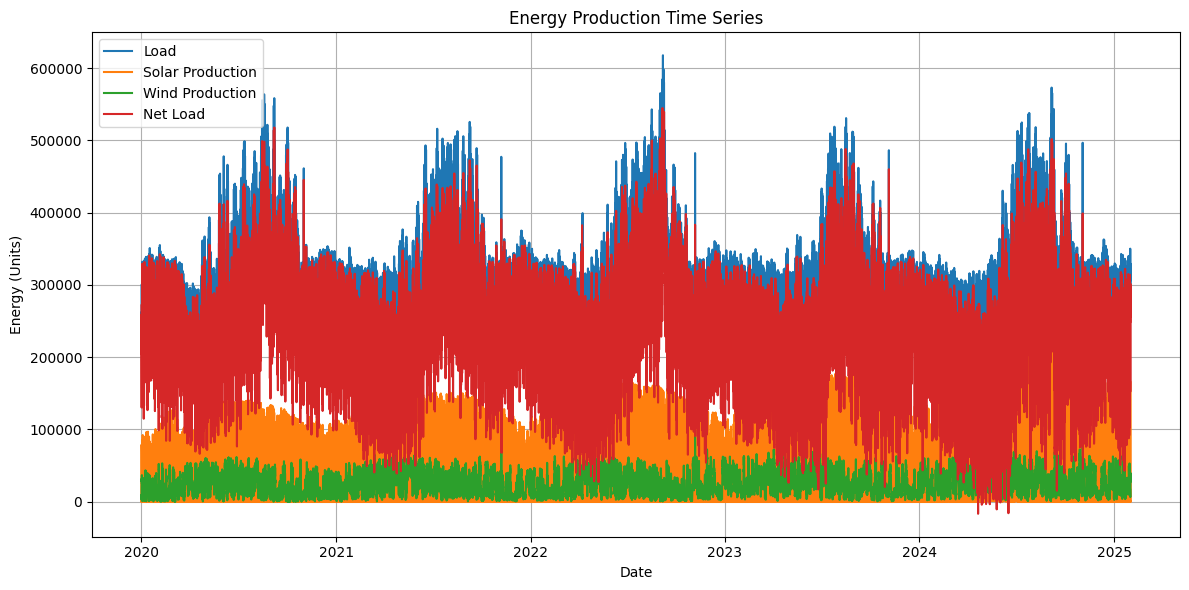

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your merged_data DataFrame is loaded as df
# If reading from CSV, you might do:
df = merged_data.copy()

# Ensure the 'date' column is a datetime type and sort the dataframe by date.
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

# -------------------------
# Graph 1: Energy Production Time Series
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['load'], label='Load')
plt.plot(df['date'], df['solar'], label='Solar Production')
plt.plot(df['date'], df['wind'], label='Wind Production')
plt.plot(df['date'], df['net load'], label='Net Load')
plt.xlabel('Date')
plt.ylabel('Energy (Units)')
plt.title('Energy Production Time Series')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


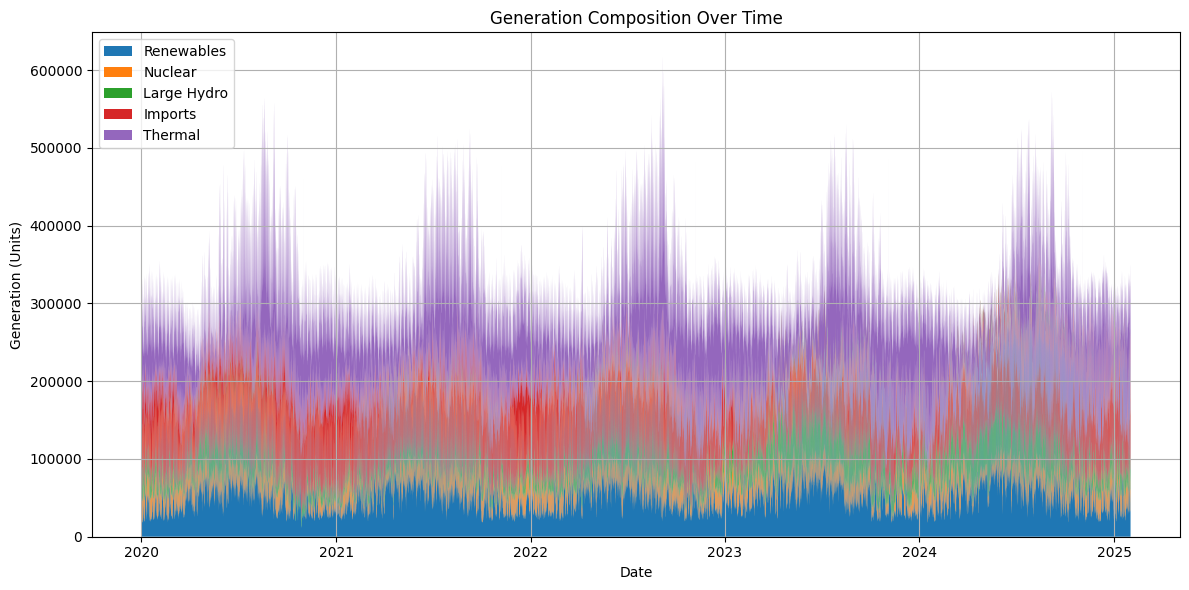

In [31]:
# -------------------------
# Graph 2: Generation Composition Over Time (Stacked Area Chart)
plt.figure(figsize=(12, 6))
plt.stackplot(df['date'],
              df['renewables'],
              df['nuclear'],
              df['large hydro'],
              df['imports'],
              df['thermal'],
              labels=['Renewables', 'Nuclear', 'Large Hydro', 'Imports', 'Thermal'])
plt.xlabel('Date')
plt.ylabel('Generation (Units)')
plt.title('Generation Composition Over Time')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

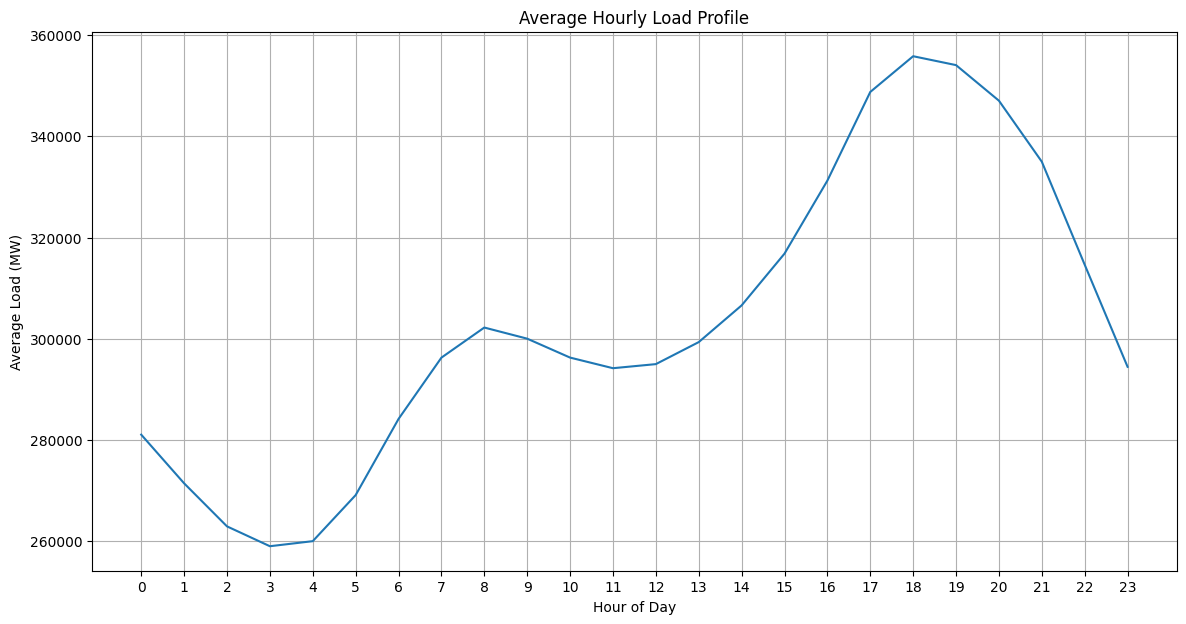

In [32]:
merged_data['date'] = pd.to_datetime(merged_data['date'])
merged_data.set_index('date', inplace=True)
# Hourly Load Pattern
merged_data['hour'] = merged_data.index.hour
hourly_profile = merged_data.groupby('hour')['load'].mean()
plt.figure(figsize=(14, 7))
hourly_profile.plot(kind='line')
plt.title('Average Hourly Load Profile')
plt.xlabel('Hour of Day')
plt.ylabel('Average Load (MW)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

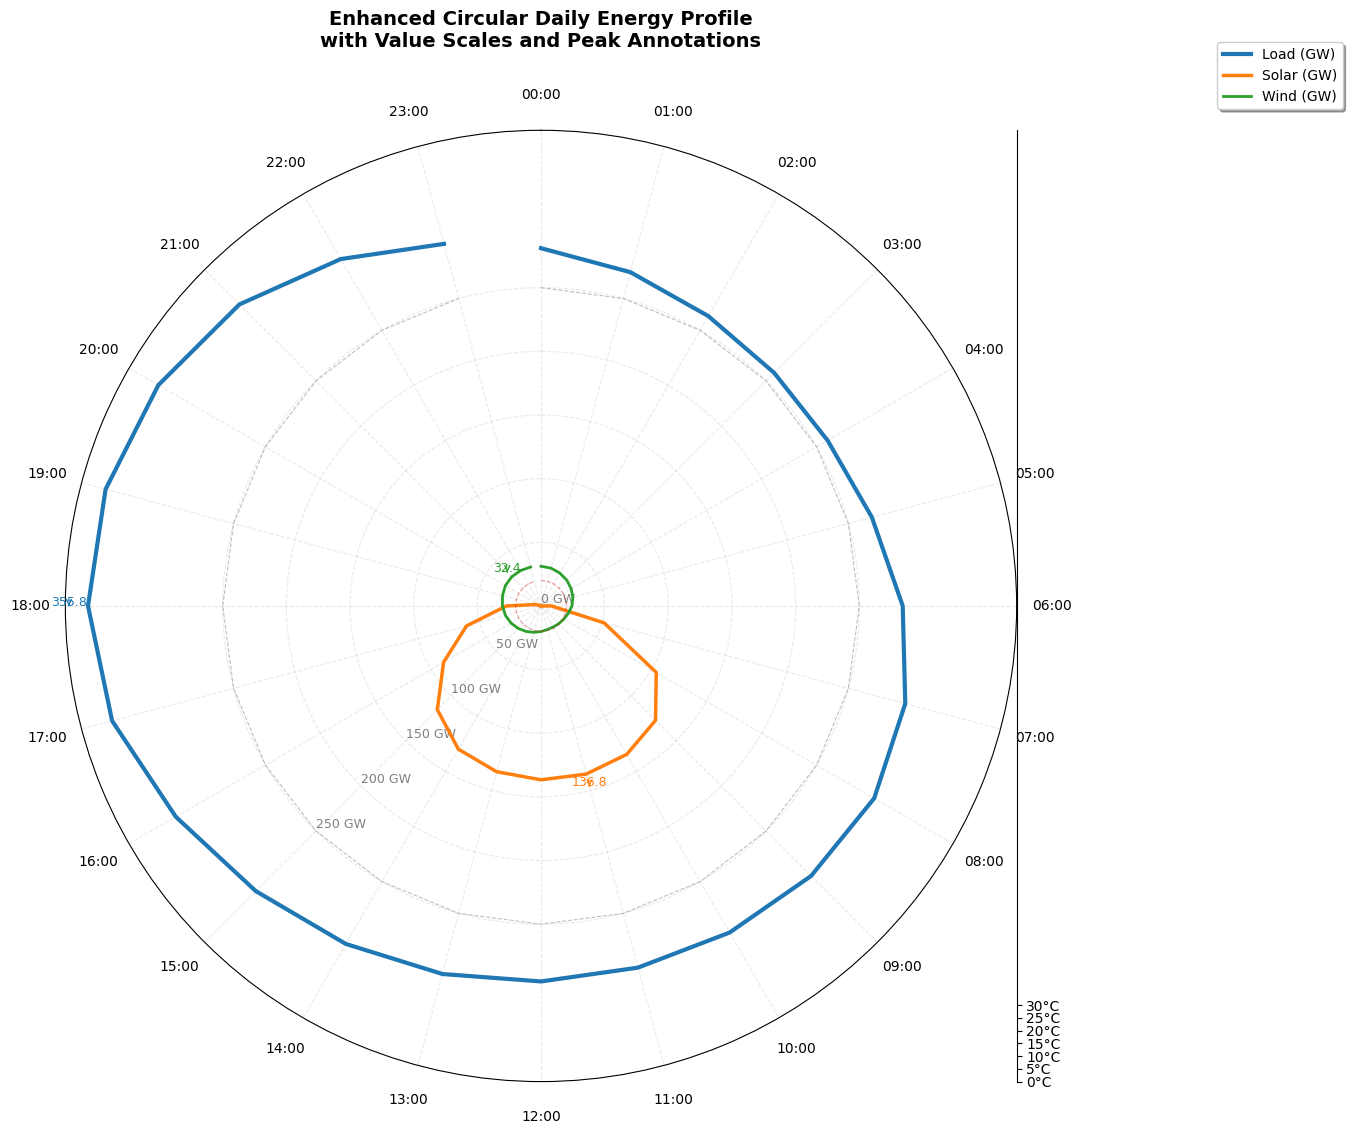

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate hourly averages
merged_data['hour'] = merged_data.index.hour
hourly_avg = merged_data.groupby('hour').agg({
    'load': 'mean',
    'solar': 'mean',
    'wind': 'mean',
    'temp': 'mean'
}).reset_index()

# Convert to polar coordinates
theta = np.linspace(0, 2*np.pi, 24, endpoint=False)
hours = [f"{h:02d}:00" for h in range(24)]

# Create circular plot
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111, polar=True)

# Custom color scheme
colors = {'load': '#1f77b4', 'solar': '#ff7f0e',
         'wind': '#2ca02c', 'temp': '#d62728'}

# Plot elements with value annotations
# 1. Load (outer ring)
load_line = ax.plot(theta, hourly_avg['load']/1000,
                   linewidth=3,
                   color=colors['load'],
                   label='Load (GW)')

# 2. Solar (middle ring)
solar_line = ax.plot(theta, hourly_avg['solar']/1000,
                    linewidth=2.5,
                    color=colors['solar'],
                    label='Solar (GW)')

# 3. Wind (inner ring)
wind_line = ax.plot(theta, hourly_avg['wind']/1000,
                   linewidth=2,
                   color=colors['wind'],
                   label='Wind (GW)')

# # 4. Temperature (filled area)
# temp_fill = ax.fill(theta, hourly_avg['temp'],
#                    alpha=0.2,
#                    color=colors['temp'],
#                    label='Temperature (°C)')

# ========== ENHANCEMENTS ==========
# 1. Add radial value scales
ax.set_rgrids(
    radii=np.arange(0, 300, 50),  # GW scale
    labels=[f'{x} GW' for x in np.arange(0, 300, 50)],
    angle=225,
    color='gray',
    fontsize=9
)

# Add temperature scale on secondary axis
ax_temp = ax.secondary_yaxis('right')
ax_temp.set_yticks(np.arange(0, 35, 5))
ax_temp.set_yticklabels([f'{x}°C' for x in np.arange(0, 35, 5)])
ax_temp.yaxis.label.set_color(colors['temp'])

# 2. Add peak value annotations
def annotate_peaks(data, label, color, offset):
    max_idx = np.argmax(data)
    ax.annotate(f'{data[max_idx]:.1f}',
                xy=(theta[max_idx], data[max_idx] + offset),
                color=color,
                ha='center',
                fontsize=9,
                arrowprops=dict(arrowstyle="->", color=color))

annotate_peaks(hourly_avg['load']/1000, 'Load', colors['load'], 15)
annotate_peaks(hourly_avg['solar']/1000, 'Solar', colors['solar'], 10)
annotate_peaks(hourly_avg['wind']/1000, 'Wind', colors['wind'], 5)

# 3. Improve time labels
ax.set_xticks(theta)
ax.set_xticklabels(hours, fontsize=10)
ax.tick_params(axis='x', pad=15)  # Move labels outward

# 4. Add dual-purpose legend
legend = ax.legend(loc='upper right', bbox_to_anchor=(1.35, 1.1),
                  frameon=True, shadow=True)
legend.get_frame().set_facecolor('white')

# 5. Add reference lines
ax.plot(theta, [250]*24, '--', color='gray', alpha=0.5, lw=0.8)  # 250 GW reference
ax.plot(theta, [20]*24, '--', color=colors['temp'], alpha=0.5, lw=0.8)  # 20°C reference

# Final styling
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.grid(color='lightgray', alpha=0.5, linestyle='--')
plt.title('Enhanced Circular Daily Energy Profile\nwith Value Scales and Peak Annotations',
         pad=60,
         fontsize=14,
         fontweight='bold')

plt.tight_layout()
plt.show()

### Correlation Matrix

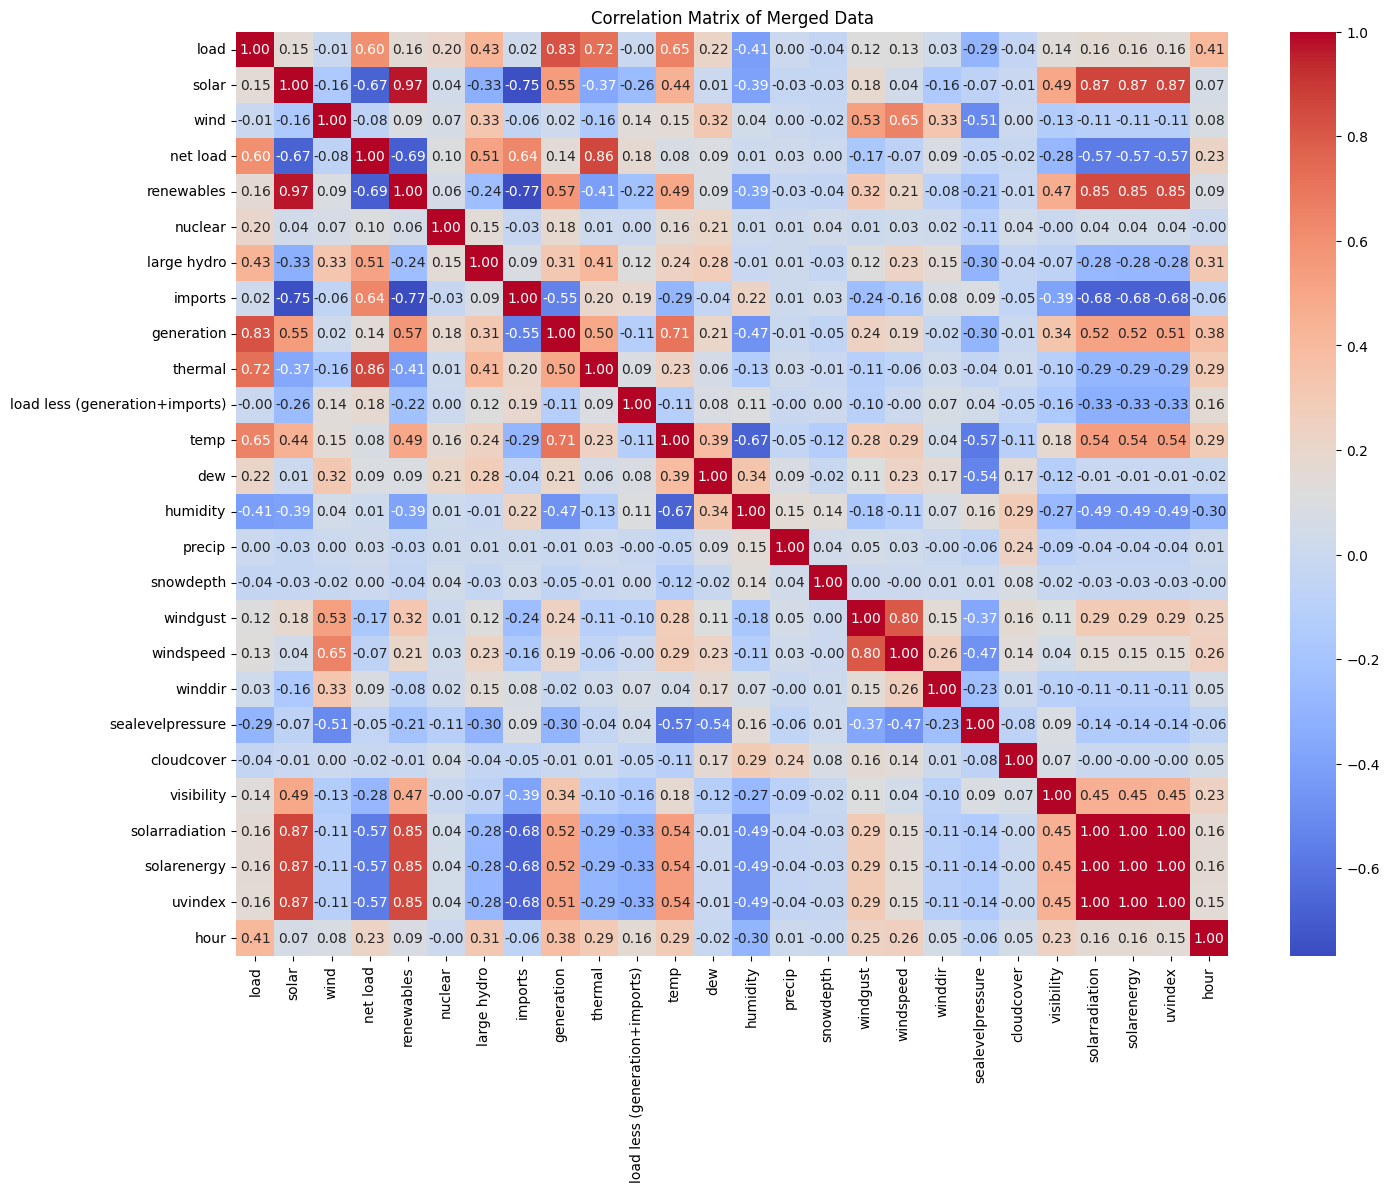

In [34]:

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Merged Data')
plt.show()

To model **`load`** while addressing multicollinearity, we first identify variables from your list with significant correlations to `load` (≥ |0.15|) and then check for high inter-correlations (≥ |0.7|) among them.

### Variables with Significant Correlation to `load`:  
1. **`temp`** (0.65)  
2. **`humidity`** (0.41)  
3. **`sealevelpressure`** (0.29)  
4. **`dew`** (0.22)  
5. **`solarradiation`** (0.16)  

### Multicollinearity Analysis:  
- **`solarradiation`** and **`solarenergy`** are **perfectly correlated (1.00)**. **Action**: Drop `solarenergy`.  
- **`temp`** and **`sealevelpressure`** have moderate correlation (**0.57**). Since `temp` has a stronger link to `load`, retain `temp` and drop `sealevelpressure` if strict collinearity thresholds (e.g., >0.5) are enforced.  
- **`dew`** and **`temp`** have weak-moderate correlation (**0.39**). Retain both as correlation is below typical thresholds.  

### Final Variables to Include:  
1. **`temp`**  
2. **`humidity`**  
3. **`solarradiation`**  
4. **`dew`** (optional; lower correlation with `load` but acceptable collinearity)  

### Variables to Drop:  
- **`solarenergy`** (duplicate of `solarradiation`).  
- **`sealevelpressure`** (optional; if strict about moderate collinearity with `temp`).  

### Notes:  
- **`datetime`** is not in the correlation matrix but is critical for time-series models (e.g., capturing hourly/daily trends).  
- Variables like `precip`, `snowdepth`, `windgust`, `windspeed`, etc., have negligible correlations with `load` and can be excluded.  

**Final recommendation for load**: Use **`temp`**, **`humidity`** and **`solarradiation`** for modeling.

In [35]:
data=merged_data.copy()
# Defining the features and the target of the model

X = data[['temp', 'humidity']] # Features
y = data['load'] # Target

In [36]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize Linear Regression model
linear_reg = LinearRegression()

# Fit the model on training data
linear_reg.fit(X_train, y_train)


print('Intercept:', linear_reg.intercept_)

Intercept: 171777.30123091626


In [38]:
# Predict on training and test data
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

# Calculate R-squared for train dataset
r2_train_score = linear_reg.score(X_train, y_train)

# Calculate R-squared for test dataset
r2_test_score = linear_reg.score(X_test, y_test)

# Calculate Mean Absolute Error (MAE) for train dataset
mae_train = mean_absolute_error(y_train, y_pred_train)

# Calculate Mean Absolute Error (MAE) for test dataset
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate Mean Squared Error (MSE) for train dataset
mse_train = mean_squared_error(y_train, y_pred_train)

# Calculate Mean Squared Error (MSE) for test dataset
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the results
print("Linear Regression Results:")
print('\nR^2 score for train dataset = ', round(r2_train_score, 4))
print('R^2 score for test dataset = ', round(r2_test_score, 4))
print('\nMean Absolute Error (MAE) for train dataset = ', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset = ', round(mae_test, 4))
print('\nMean Squared Error (MSE) for train dataset = ', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset = ', round(mse_test, 4))

Linear Regression Results:

R^2 score for train dataset =  0.4274
R^2 score for test dataset =  0.4185

Mean Absolute Error (MAE) for train dataset =  33971.0192
Mean Absolute Error (MAE) for test dataset =  34086.2221

Mean Squared Error (MSE) for train dataset =  1893928199.8552
Mean Squared Error (MSE) for test dataset =  1906826070.8438


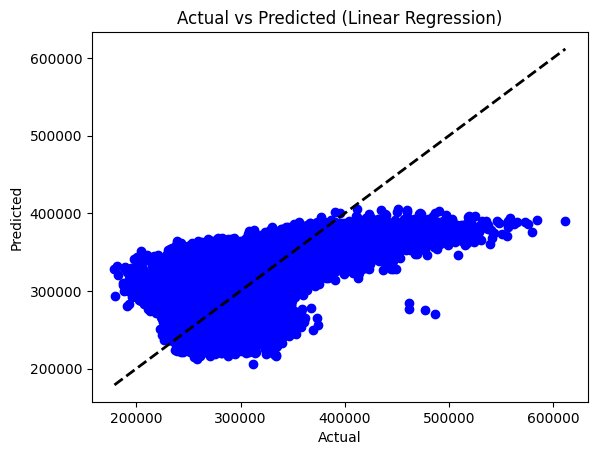

In [39]:
# Plotting the actual vs predicted values for the test dataset
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Linear Regression)')
plt.show()

Polynomial Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Define the degree of the polynomial
degree = 2  # You can adjust this parameter based on your requirements

# Create polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Initialize and fit the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

LinearRegression()

In [41]:
# Predictions on training and test set
y_pred_train = poly_reg.predict(X_poly_train)
y_pred_test = poly_reg.predict(X_poly_test)

# Calculate R-squared for train and test dataset
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Calculate Mean Absolute Error (MAE) for train and test dataset
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate Mean Squared Error (MSE) for train and test dataset
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Polynomial Regression (Degree = {}):".format(degree))
print("\nR^2 score for train dataset = {:.4f}".format(r2_train))
print("R^2 score for test dataset = {:.4f}".format(r2_test))
print("\nMean Absolute Error (MAE) for train dataset = {:.4f}".format(mae_train))
print("Mean Absolute Error (MAE) for test dataset = {:.4f}".format(mae_test))
print("\nMean Squared Error (MSE) for train dataset = {:.4f}".format(mse_train))
print("Mean Squared Error (MSE) for test dataset = {:.4f}".format(mse_test))

Polynomial Regression (Degree = 2):

R^2 score for train dataset = 0.5788
R^2 score for test dataset = 0.5700

Mean Absolute Error (MAE) for train dataset = 29442.4289
Mean Absolute Error (MAE) for test dataset = 29578.1248

Mean Squared Error (MSE) for train dataset = 1393196953.8217
Mean Squared Error (MSE) for test dataset = 1409875604.1920


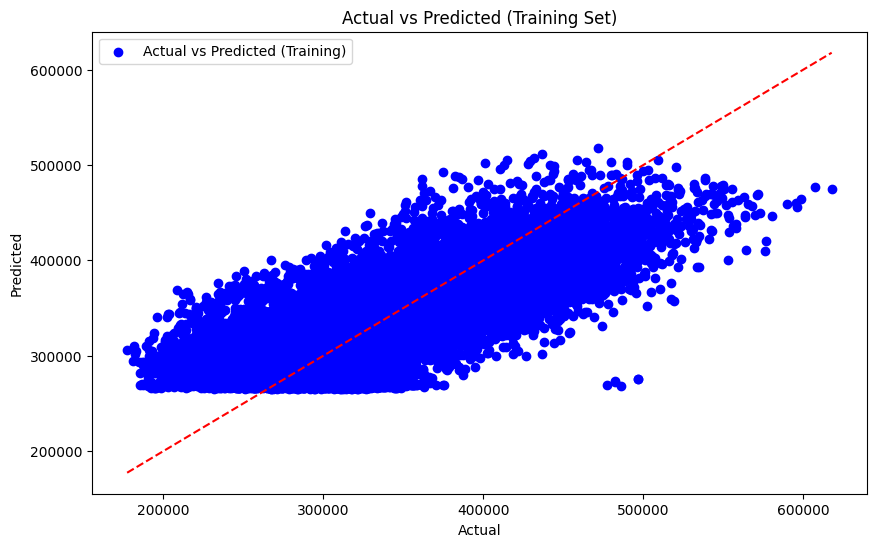

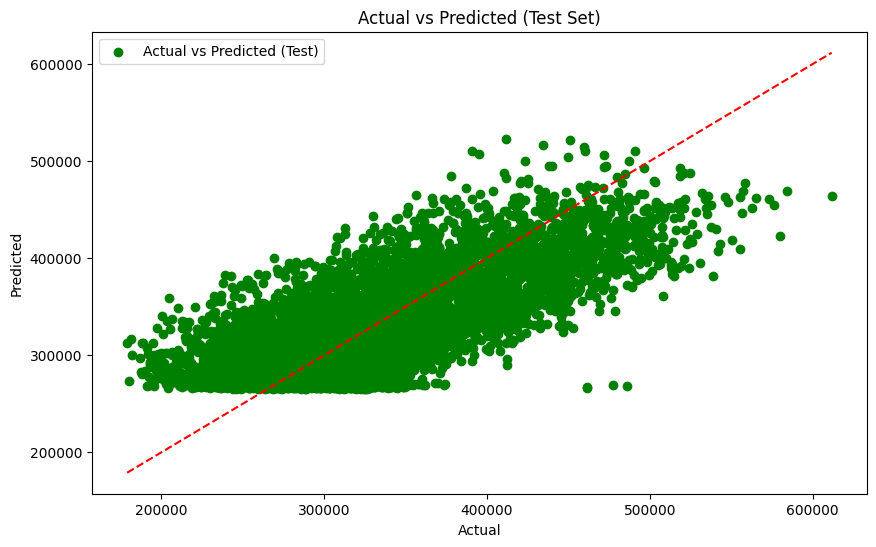

In [42]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values for the training set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Actual vs Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Training Set)')
plt.legend()
plt.show()

# Plotting the actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Actual vs Predicted (Test)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Test Set)')
plt.legend()
plt.show()


In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define the degree of polynomial
degree = 3

# Create polynomial features
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit linear regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

LinearRegression()

In [44]:
# Predictions on training and test set
y_pred_train = poly_reg.predict(X_poly_train)
y_pred_test = poly_reg.predict(X_poly_test)

# Calculate R-squared for train and test dataset
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Calculate Mean Absolute Error (MAE) for train and test dataset
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate Mean Squared Error (MSE) for train and test dataset
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Polynomial Regression (Degree = {}):".format(degree))
print("R^2 score for train dataset = {:.4f}".format(r2_train))
print("R^2 score for test dataset = {:.4f}".format(r2_test))
print("Mean Absolute Error (MAE) for train dataset = {:.4f}".format(mae_train))
print("Mean Absolute Error (MAE) for test dataset = {:.4f}".format(mae_test))
print("Mean Squared Error (MSE) for train dataset = {:.4f}".format(mse_train))
print("Mean Squared Error (MSE) for test dataset = {:.4f}".format(mse_test))

Polynomial Regression (Degree = 3):
R^2 score for train dataset = 0.5918
R^2 score for test dataset = 0.5833
Mean Absolute Error (MAE) for train dataset = 28932.3806
Mean Absolute Error (MAE) for test dataset = 29010.6235
Mean Squared Error (MSE) for train dataset = 1350326683.3174
Mean Squared Error (MSE) for test dataset = 1366501439.4948


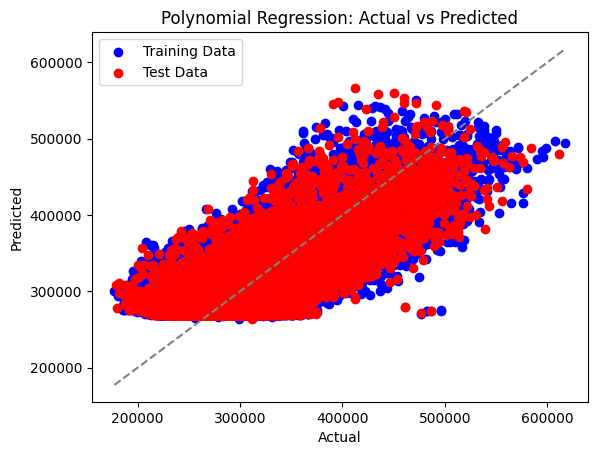

In [45]:
import matplotlib.pyplot as plt

# Plotting the training data
plt.scatter(y_train, y_pred_train, color='blue', label='Training Data')

# Plotting the test data
plt.scatter(y_test, y_pred_test, color='red', label='Test Data')

# Plotting the diagonal line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='gray', linestyle='--')

plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

DecisionTreeRegressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

# Constructing a tree regressor without hyperparameters tuning
tr_reg = DecisionTreeRegressor(random_state=3)

# Fitting the tree regressor to the training data
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=3)

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predicting on the training set
y_train_pred = tr_reg.predict(X_train)

# Predicting on the test set
y_test_pred = tr_reg.predict(X_test)

# Calculating R^2 score for train and test datasets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating Mean Absolute Error (MAE) for train and test datasets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculating Mean Squared Error (MSE) for train and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Printing the metrics
print('Decision Tree Regressor:')
print('R^2 score for train dataset =', round(r2_train, 4))
print('R^2 score for test dataset =', round(r2_test, 4))
print('\nMean Absolute Error (MAE) for train dataset =', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset =', round(mae_test, 4))
print('\nMean Squared Error (MSE) for train dataset =', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset =', round(mse_test, 4))

Decision Tree Regressor:
R^2 score for train dataset = 0.9982
R^2 score for test dataset = 0.1843

Mean Absolute Error (MAE) for train dataset = 179.2217
Mean Absolute Error (MAE) for test dataset = 40068.7313

Mean Squared Error (MSE) for train dataset = 5840443.1905
Mean Squared Error (MSE) for test dataset = 2674798312.0911


In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=3), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [49]:
from sklearn.tree import DecisionTreeRegressor

# The best parameters
best_params = {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}


# Create a DecisionTreeRegressor with the best parameters
best_tree_reg = DecisionTreeRegressor(**best_params)

# Fit the model to the training data
best_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=10)

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the training data
y_pred_train = best_tree_reg.predict(X_train)

# Predict on the test data
y_pred_test = best_tree_reg.predict(X_test)

# Calculate R-squared for train dataset
r2_train_score = best_tree_reg.score(X_train, y_train)
# Calculate R-squared for test dataset
r2_test_score = best_tree_reg.score(X_test, y_test)


# Calculate Mean Absolute Error (MAE) for train dataset
mae_train = mean_absolute_error(y_train, y_pred_train)
# Calculate Mean Absolute Error (MAE) for test dataset
mae_test = mean_absolute_error(y_test, y_pred_test)


# Calculate Mean Squared Error (MSE) for train dataset
mse_train = mean_squared_error(y_train, y_pred_train)
# Calculate Mean Squared Error (MSE) for test dataset
mse_test = mean_squared_error(y_test, y_pred_test)

print('Decision Tree Regressor (After Hyper Parameter Tuning):')

print('\nR^2 score for train dataset = ', round(r2_train_score, 4))
print('R^2 score for test dataset = ', round(r2_test_score, 4))

print('\nMean Absolute Error (MAE) for train dataset = ', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset = ', round(mae_test, 4))

print('\nMean Squared Error (MSE) for train dataset = ', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset = ', round(mse_test, 4))

Decision Tree Regressor (After Hyper Parameter Tuning):

R^2 score for train dataset =  0.6128
R^2 score for test dataset =  0.587

Mean Absolute Error (MAE) for train dataset =  28185.9601
Mean Absolute Error (MAE) for test dataset =  28827.6342

Mean Squared Error (MSE) for train dataset =  1280760472.5853
Mean Squared Error (MSE) for test dataset =  1354375985.6074


Bagging Regression


In [2]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Assuming you have already defined X and y as features and target

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Constructing a decision tree regressor (base estimator)
base_estimator = DecisionTreeRegressor()

# Constructing the bagging regressor
# Use 'estimator' instead of 'base_estimator' for older scikit-learn versions
bag_reg = BaggingRegressor(estimator=base_estimator, random_state=3)

# Fitting the bagging regressor to the training data
bag_reg.fit(X_train, y_train)

NameError: name 'X' is not defined

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the training data
y_pred_train = bag_reg.predict(X_train)
# Predict on the test data
y_pred_test = bag_reg.predict(X_test)

# Calculate R-squared for train dataset
r2_train_score = bag_reg.score(X_train, y_train)
# Calculate R-squared for test dataset
r2_test_score = bag_reg.score(X_test, y_test)

# Calculate Mean Absolute Error (MAE) for train dataset
mae_train = mean_absolute_error(y_train, y_pred_train)
# Calculate Mean Absolute Error (MAE) for test dataset
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate Mean Squared Error (MSE) for train dataset
mse_train = mean_squared_error(y_train, y_pred_train)
# Calculate Mean Squared Error (MSE) for test dataset
mse_test = mean_squared_error(y_test, y_pred_test)

print('BaggingRegressor :')

print('\nR^2 score for train dataset = ', round(r2_train_score, 4))
print('R^2 score for test dataset = ', round(r2_test_score, 4))

print('\nMean Absolute Error (MAE) for train dataset = ', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset = ', round(mae_test, 4))

print('\nMean Squared Error (MSE) for train dataset = ', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset = ', round(mse_test, 4))

BaggingRegressor :

R^2 score for train dataset =  0.9111
R^2 score for test dataset =  0.4926

Mean Absolute Error (MAE) for train dataset =  12389.1782
Mean Absolute Error (MAE) for test dataset =  31713.7853

Mean Squared Error (MSE) for train dataset =  294214144.6157
Mean Squared Error (MSE) for test dataset =  1663843349.3356


In [1]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

# Define the base estimator
base_estimator = DecisionTreeRegressor()

# Define the parameters grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False]
}

# Initialize the BaggingRegressor
# Use 'estimator' instead of 'base_estimator' for compatibility with newer scikit-learn versions
bagging_reg = BaggingRegressor(estimator=base_estimator, random_state=3)

# Initialize GridSearchCV
grid_search = GridSearchCV(bagging_reg, param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

NameError: name 'DecisionTreeRegressor' is not defined

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Bagging Regressor:", best_params)

In [ ]:
from sklearn.ensemble import BaggingRegressor

# Initialize BaggingRegressor with best hyperparameters
best_bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(),
                                     n_estimators=100,
                                     max_samples=0.5,
                                     max_features=1.0,
                                     bootstrap=True,
                                     random_state=3)

# Fit the model to the training data
best_bagging_reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict on the training data
y_pred_train = best_bagging_reg.predict(X_train)
# Predict on the test data
y_pred_test = best_bagging_reg.predict(X_test)

# Calculate R-squared for train dataset
r2_train_score = best_bagging_reg.score(X_train, y_train)
# Calculate R-squared for test dataset
r2_test_score = best_bagging_reg.score(X_test, y_test)

# Calculate Mean Absolute Error (MAE) for train dataset
mae_train = mean_absolute_error(y_train, y_pred_train)
# Calculate Mean Absolute Error (MAE) for test dataset
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate Mean Squared Error (MSE) for train dataset
mse_train = mean_squared_error(y_train, y_pred_train)
# Calculate Mean Squared Error (MSE) for test dataset
mse_test = mean_squared_error(y_test, y_pred_test)

print('Bagging Regressor (After Hyper Parameter Tuning)\n')

print('R^2 score for train dataset = ', round(r2_train_score, 4))
print('R^2 score for test dataset = ', round(r2_test_score, 4))

print('\nMean Absolute Error (MAE) for train dataset = ', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset = ', round(mae_test, 4))

print('\nMean Squared Error (MSE) for train dataset = ', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset = ', round(mse_test, 4))

Random Forest Regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=3)

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predicting on the training set
y_train_pred = rf_reg.predict(X_train)

# Predicting on the test set
y_test_pred = rf_reg.predict(X_test)

# Calculating R^2 score for train and test datasets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating Mean Absolute Error (MAE) for train and test datasets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculating Mean Squared Error (MSE) for train and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Printing the metrics
print('Random Forest Regressor :\n')
print('R^2 score for train dataset =', round(r2_train, 4))
print('R^2 score for test dataset =', round(r2_test, 4))
print('\nMean Absolute Error (MAE) for train dataset =', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset =', round(mae_test, 4))
print('\nMean Squared Error (MSE) for train dataset =', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset =', round(mse_test, 4))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=3)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='r2')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor with best hyperparameters
best_rf_reg = RandomForestRegressor(**best_params)

# Fit the model to the training data
best_rf_reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predicting on the training set
y_train_pred = best_rf_reg.predict(X_train)

# Predicting on the test set
y_test_pred = best_rf_reg.predict(X_test)

# Calculating R^2 score for train and test datasets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating Mean Absolute Error (MAE) for train and test datasets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculating Mean Squared Error (MSE) for train and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Printing the metrics
print('Random Forest Regressor (After Hyper Parameter Tuning)\n')
print('R^2 score for train dataset =', round(r2_train, 4))
print('R^2 score for test dataset =', round(r2_test, 4))
print('\nMean Absolute Error (MAE) for train dataset =', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset =', round(mae_test, 4))
print('\nMean Squared Error (MSE) for train dataset =', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset =', round(mse_test, 4))

Gradient Boosting Regressor


In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor with default hyperparameters
gb_reg = GradientBoostingRegressor(random_state=3)

# Fit the model to the training data
gb_reg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predicting on the training set
y_train_pred = gb_reg.predict(X_train)

# Predicting on the test set
y_test_pred = gb_reg.predict(X_test)

# Calculating R^2 score for train and test datasets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculating Mean Absolute Error (MAE) for train and test datasets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculating Mean Squared Error (MSE) for train and test datasets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Printing the metrics
print('Gradient Boosting Regressor :\n')
print('R^2 score for train dataset =', round(r2_train, 4))
print('R^2 score for test dataset =', round(r2_test, 4))
print('\nMean Absolute Error (MAE) for train dataset =', round(mae_train, 4))
print('Mean Absolute Error (MAE) for test dataset =', round(mae_test, 4))
print('\nMean Squared Error (MSE) for train dataset =', round(mse_train, 4))
print('Mean Squared Error (MSE) for test dataset =', round(mse_test, 4))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=3)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor with the best hyperparameters
best_gb_reg = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=150, random_state=3)

# Train the model on the training data
best_gb_reg.fit(X_train, y_train)